# Charakteryzacja czujników Wilgotności

## Podczas ćwiczenia użyte zostały następujące czujniki:

<table><tr>
<td><img src="images\h1.jpg" alt="Drawing" style="width: 400px; height: 350px;"/></td>
<td><img src="images\h7.jpg" alt="Drawing" style="width: 400px; height: 350px;"/></td>    
</tr></table>

###   Impedancyjny czujnik wilgotności  Hs12SP-  to czujnik wilgotności względnej (RH) o dużej rezystancji, zapewniający zmienną wartość impedancji w odpowiedzi na zaadsorbowaną wodę w cienkowarstwowym polimerze czujnika. Nałożone na ułożoną elektrodę chemiczne grupy funkcyjne polimeru rozkładają się w obecności wody na grupy jonowe, zwiększając przewodność elektryczną czujnika. 

<table><tr>
<td><img src="images\h6.jpg" alt="Drawing" style="width: 400px; height: 350px;"/></td>
<td><img src="images\h8.jpg" alt="Drawing" style="width: 400px; height: 350px;"/></td>    
</tr></table>

###   Pojemnościowy czujnik wilgotności  Hs1101-  to kondensator, w którym pomiędzy okładkami znajduje się porowaty polimer. Para wodna absorbując się w porach powoduje wzrost pojemności elektrycznej kondensatora. Multimetr mierzy pojemność za pomocą mostka RLC, źródło sygnału o znanej częstotliwości poprzez wewnętrzny rezystor pobudza dołączony szeregowo kondensator. Prąd przemienny płynący przez kondensator, płynie również przez rezystor wymuszając na nim spadek napięcia. Zmierzenie i porównanie tego napięcia z orginalnym sygnałem pozwala obliczyć pojemność.




## Pomiary zostały wykonane przy pomocy multimetru w trybie pomiaru pojemności. Do każdej z kolb o poszczególnych atmosferach wkładano czujnik pojemnościowy a następnie impedancyjny i odczytano pomiary. Temperatura oraz ciśnienie atmosferyczne w laboratorium zmierzono za pomocą termohigrometru.

<table><tr>
<td><img src="images\h4.jpg" alt="Drawing" style="width: 450px; height: 400px;"/></td>
<td><img src="images\h3.jpg" alt="Drawing" style="width: 450px; height: 400px;"/></td>    
</tr></table>

<table><tr>
<td><img src="images\h2.jpg" alt="Drawing" style="width: 450px; height: 400px;"/></td>
<td><img src="images\h9.jpg" alt="Drawing" style="width: 450px; height: 400px;"/></td>    
</tr></table>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# utworzenie df z pomiarów spisanych w trakcie ćwiczenia

dict = {'Atmosfera' : ['otoczenie','LiCl', 'MgCl', 'Mg(NO)', 'NaCl', 'KCI'],
        
        'RH (teoretyczne)[%]' : ['-', 11,  36, 55, 75, 85],
        'Pojemność Hs1101 [nF]' : [0.17, 0.164, 0.169, 0.172, 0.177, 0.182],
        'Pojemność Hs12SP [nF]' : [0.107, 0.007, 0.074, 0.832, 4.63, '-'],
        }
dane = pd.DataFrame(dict)

display(dane)

,Atmosfera,RH (teoretyczne)[%],Pojemność Hs1101 [nF],Pojemność Hs12SP [nF]
0,otoczenie,-,0.170,0.107
1,LiCl,11,0.164,0.007
2,MgCl,36,0.169,0.074
3,Mg(NO),55,0.172,0.832
4,NaCl,75,0.177,4.63
5,KCI,85,0.182,-


#### Temperatura  w laboratorium
T = 22,5℃

#### Korekcja Wilgotności względnej (RH) atmosfer dla temperatury panującej w laboratorium
<img src="images\h11.jpg" alt="Drawing" style="width: 700px; height: 350px;"/>

In [2]:
dane["RH skorygowane[%]"] = ["-",((11.31+11.30)/2),((33.07+32.78)/2),((54.38+52.89)/2),((75.47+75.29)/2),((85.11+84.34)/2)]

In [3]:
# ustawienie kolumn w poprawny sposób
dane = dane[['Atmosfera','RH (teoretyczne)[%]','RH skorygowane[%]','Pojemność Hs1101 [nF]','Pojemność Hs12SP [nF]']]

In [4]:
dane

,Atmosfera,RH (teoretyczne)[%],RH skorygowane[%],Pojemność Hs1101 [nF],Pojemność Hs12SP [nF]
0,otoczenie,-,-,0.170,0.107
1,LiCl,11,11.305,0.164,0.007
2,MgCl,36,32.925,0.169,0.074
3,Mg(NO),55,53.635,0.172,0.832
4,NaCl,75,75.38,0.177,4.63
5,KCI,85,84.725,0.182,-


***
$\mathbf{\text{Obliczenie pary nasyconej:}}$<br>

***
Równanie Ardena Bucka
$$
  p_n = 0,61121 * exp((18,678-\frac{T}{234,5})(\frac{T}{257,14+T}))
$$ 
$p_n$ – ciśnienie pary nasyconej w kPa <br>
T – temperatura w ℃ <br>

$$
  p_n = 0,61121 * exp((18,678-\frac{22,5}{234,5})(\frac{22,5}{257,14+22,5})) = 2,72[kPa] = 2720[Pa]
$$ 

***
$\mathbf{\text{Przykładowe obliczenia ciśnienia cząstkowego pary wodnej:}}$<br>

***

$$
  p_w = \frac{RH}{100%}*p_n
$$ 
Dla LiCl:
$$
  p_w = \frac{11,305}{100%}*2,72 = 0,307 [kPa]
$$ 

Dla NaCl:
$$
  p_w = \frac{75,38}{100%}*2,72 = 2,05 [kPa]
$$ 

## 1.Określanie wilgotności otoczenia dla czujników

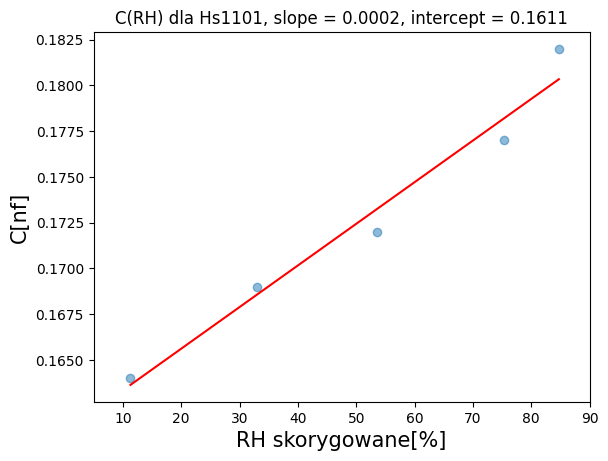

In [14]:
# wykres C(RH) dla czujnika Hs1101 i regresja liniowa pozwalająca obliczyć przypuszczalną wilgotność w pomieszczeniu

x = dane.loc[1:5]['RH skorygowane[%]']
y = dane.loc[1:5]['Pojemność Hs1101 [nF]']

plt.xlabel('RH skorygowane[%]', fontsize = 15)
plt.ylabel('C[nf]', fontsize = 15)
plt.xlim(5,90)
plt.scatter(x, y, alpha=0.5)

x1 = np.asarray(dane.loc[1:5]['RH skorygowane[%]'], dtype='float')

y1 = np.asarray(dane.loc[1:5]['Pojemność Hs1101 [nF]'], dtype='float')

m, b = np.polyfit(x1, y1, 1)

plt.plot(x1, m*x1+b, color='red')

plt.title(f'C(RH) dla Hs1101, slope = {round(m, 4)}, intercept = {round(b, 4)}')

plt.show()

***
$\mathbf{\text{Wilgotność RH otoczenia określona dla czujnika pojemnościowego Hs1101:}}$<br>

***
#pomiar czujnika dla otoczenia 0,17[nF]

$$
  y = 0,0002x + 0,1611
$$ 
$$ 
0,17 = 0,0002x + 0,1611
$$ 
$$
x = 44,5{%}
$$